In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [11]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [12]:
1238/24

51.583333333333336

In [13]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 121s 525ms/step - loss: 1.1714 - accuracy: 0.7918 - val_loss: 0.1805 - val_accuracy: 0.9365
Epoch 2/10
225/225 [==============================] - 117s 521ms/step - loss: 0.2195 - accuracy: 0.9224 - val_loss: 0.1612 - val_accuracy: 0.9442
Epoch 3/10
225/225 [==============================] - 136s 604ms/step - loss: 0.1936 - accuracy: 0.9322 - val_loss: 0.0981 - val_accuracy: 0.9650
Epoch 4/10
225/225 [==============================] - 134s 596ms/step - loss: 0.1408 - accuracy: 0.9556 - val_loss: 0.1454 - val_accuracy: 0.9484
Epoch 5/10
225/225 [==============================] - 121s 535ms/step - loss: 0.1008 - accuracy: 0.9655 - val_loss: 0.1714 - val_accuracy: 0.9454
Epoch 6/10
225/225 [==============================] - 128s 568ms/step - loss: 0.1192 - accuracy: 0.9582 - val_loss: 0.1247 - val_accuracy: 0.9626
Epoch 7/10
225/225 [==============================] - 124s 552ms/step - loss: 0.1027 - accuracy: 0.9653 - val_loss: 0.0907 -

In [15]:
model.save('fruitdata.h5')

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('fruitdata.h5')

In [19]:
img=image.load_img(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___healthy\9dfbeea0-0afb-4f03-ae40-5c4508141a6a___R.S_HL 7913 copy.jpg")

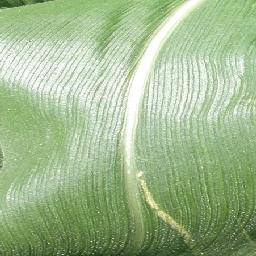

In [20]:
img

In [22]:
img=image.load_img(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___healthy\9dfbeea0-0afb-4f03-ae40-5c4508141a6a___R.S_HL 7913 copy.jpg",target_size=(128,128))

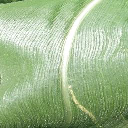

In [23]:
img

In [24]:
x=image.img_to_array(img)

In [25]:
x

array([[[ 63.,  94.,  52.],
        [ 62.,  93.,  51.],
        [ 58.,  89.,  47.],
        ...,
        [148., 189., 121.],
        [140., 181., 111.],
        [137., 179., 107.]],

       [[ 57.,  88.,  47.],
        [ 45.,  76.,  34.],
        [ 50.,  81.,  39.],
        ...,
        [140., 181., 113.],
        [145., 186., 116.],
        [170., 211., 141.]],

       [[ 48.,  79.,  37.],
        [ 45.,  76.,  34.],
        [ 40.,  71.,  29.],
        ...,
        [150., 191., 123.],
        [189., 230., 162.],
        [159., 200., 130.]],

       ...,

       [[ 93., 119.,  72.],
        [ 99., 125.,  77.],
        [ 75., 102.,  49.],
        ...,
        [102., 121.,  75.],
        [109., 126.,  81.],
        [104., 122.,  74.]],

       [[ 59.,  85.,  40.],
        [100., 126.,  79.],
        [ 76., 103.,  52.],
        ...,
        [117., 136.,  90.],
        [114., 132.,  84.],
        [125., 143.,  95.]],

       [[ 72.,  98.,  53.],
        [ 89., 115.,  68.],
        [ 76., 1

In [26]:
x=np.expand_dims(x,axis=0)

In [27]:
x

array([[[[ 63.,  94.,  52.],
         [ 62.,  93.,  51.],
         [ 58.,  89.,  47.],
         ...,
         [148., 189., 121.],
         [140., 181., 111.],
         [137., 179., 107.]],

        [[ 57.,  88.,  47.],
         [ 45.,  76.,  34.],
         [ 50.,  81.,  39.],
         ...,
         [140., 181., 113.],
         [145., 186., 116.],
         [170., 211., 141.]],

        [[ 48.,  79.,  37.],
         [ 45.,  76.,  34.],
         [ 40.,  71.,  29.],
         ...,
         [150., 191., 123.],
         [189., 230., 162.],
         [159., 200., 130.]],

        ...,

        [[ 93., 119.,  72.],
         [ 99., 125.,  77.],
         [ 75., 102.,  49.],
         ...,
         [102., 121.,  75.],
         [109., 126.,  81.],
         [104., 122.,  74.]],

        [[ 59.,  85.,  40.],
         [100., 126.,  79.],
         [ 76., 103.,  52.],
         ...,
         [117., 136.,  90.],
         [114., 132.,  84.],
         [125., 143.,  95.]],

        [[ 72.,  98.,  53.],
       

In [28]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 6s 6s/step


In [29]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [30]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [31]:
index[y[0]]

'Corn_(maize)___healthy'

In [33]:
img=image.load_img(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___healthy\9dfbeea0-0afb-4f03-ae40-5c4508141a6a___R.S_HL 7913 copy.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 95ms/step


'Corn_(maize)___healthy'